# 1주차 과제 - EDA&전처리

## 과제 내용
    
    주어진 데이터를 사용하여 아래의 문제를 해결하세요.
    
    1) Python을 활용하여 전처리 및 EDA를 해주세요.
        1. 결측값 처리를 하고 그 이유를 써주세요
        2. 연속형 변수 간의 상관관계를 Heatmap과 Pair Plot을 이용하여 파악하고  
           correlation 수치를 통해 상관관계를 확인 및 설명하세요.
        3. 유의미한 시각화 10개 이상 만들고 그 결과에 대한 설명을 덧붙이세요. 
           이 중 3개 이상은 Seaborn을 이용하여 시각화를 진행해주세요.

    2) 1-3에서 도출된 시각화와 그에 따른 Insight를 바탕으로 유의미해 보이는  
       Feature를 5개 이상 생성해 주세요.

### 1 - 1 결측값 처리를 하고 그 이유를 써주세요.

     본격적인 결측값 처리에 앞서 기본적인 세팅 후, 자료를 간략하게 훑어본다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("과제data2.csv", encoding = "cp949")

In [4]:
df

,case_id,province,city,group,infection_case,confirmed,latitude_x,longitude_x,code,latitude_y,longitude_y,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,10210.0,37.532768,126.990021,15.0,13.0,1.0,0.68,16.87,6.5,435.0
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,10050.0,37.478290,126.951502,22.0,33.0,1.0,0.89,15.12,4.9,909.0
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,10070.0,37.495632,126.887650,26.0,34.0,3.0,1.00,16.21,5.7,741.0
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,10190.0,37.517189,126.866618,30.0,43.0,0.0,2.26,13.55,5.5,816.0
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,10100.0,37.668952,127.047082,23.0,26.0,1.0,0.95,17.89,7.2,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,6100012,Gyeongsangnam-do,-,False,etc,20,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,7000001,Jeju-do,-,False,overseas inflow,14,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,7000002,Jeju-do,-,False,contact with patient,0,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,7000003,Jeju-do,-,False,etc,4,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns.values)

[' case_id' 'province' 'city' 'group' 'infection_case' 'confirmed'
 'latitude_x' 'longitude_x' 'code' 'latitude_y' 'longitude_y'
 'elementary_school_count' 'kindergarten_count' 'university_count'
 'academy_ratio' 'elderly_population_ratio' 'elderly_alone_ratio'
 'nursing_home_count']


     분석에 사용할 데이터는 코로나 확정자 및 확정자가 나온 지역과 관련된 데이터이다. 데이터에 들어있는 변수명은 위와 같고 변수의 의미는 아래와 같다.
     
     case_id : 각 행정구역별 자료의 갯수
     province : 시, 도 단위 행정구역 (1단계)
     city : 구, 군, 시 단위 행정구역 (2단계)
     group : 단체감염 여부
     infection_case : 감염 경로
     confirmed : 코로나 바이러스 확정자 수
     latitude_x : 위도 (object)
     longitude_x : 경도 (object)
     code : 행정구역 코드
     latitude_y : 위도 (float64)
     longitude_y : 경도 (float64)
     elementary_school_count : 초등학교 수
     kindergarten_count : 유치원 수
     university_count : 대학교 수
     academy_ratio : 인구 천명 당 사설학원 수
     elderly_population_ratio : 고령인구 비율
     elderly_alone_ratio : 독거노인 가구비율
     nursing_home_count : 요양원 수

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    case_id                  174 non-null    int64  
 1   province                  174 non-null    object 
 2   city                      174 non-null    object 
 3   group                     174 non-null    bool   
 4   infection_case            174 non-null    object 
 5   confirmed                 174 non-null    int64  
 6   latitude_x                174 non-null    object 
 7   longitude_x               174 non-null    object 
 8   code                      68 non-null     float64
 9   latitude_y                68 non-null     float64
 10  longitude_y               68 non-null     float64
 11  elementary_school_count   68 non-null     float64
 12  kindergarten_count        68 non-null     float64
 13  university_count          68 non-null     float64
 14  academy_ra

In [7]:
df.describe()

,case_id,confirmed,code,latitude_y,longitude_y,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
count,1.740000e+02,174.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2.686216e+06,65.488506,24055.147059,36.742407,127.523884,33.382353,53.073529,2.382353,1.622794,16.517941,7.273529,902.764706
std,1.943218e+06,355.097654,19648.760965,0.898821,0.778639,21.677438,42.770933,2.305279,0.827519,5.643317,3.877321,749.701654
min,1.000001e+06,0.000000,10010.000000,34.990368,126.450289,10.000000,13.000000,0.000000,0.360000,9.080000,3.800000,47.000000
25%,1.100006e+06,4.000000,10190.000000,35.840989,126.956752,18.000000,22.750000,1.000000,1.000000,13.170000,5.050000,427.000000
50%,1.700004e+06,10.000000,12545.000000,37.302670,127.047222,30.500000,38.500000,2.000000,1.535000,15.385000,6.200000,728.000000
75%,4.100004e+06,31.750000,32570.000000,37.518421,128.358655,39.000000,63.500000,3.000000,1.860000,18.075000,7.400000,1099.000000
max,7.000004e+06,4511.000000,61130.000000,37.738058,129.163594,110.000000,195.000000,10.000000,4.180000,36.550000,21.000000,3088.000000


In [8]:
df.isnull().sum()

 case_id                      0
province                      0
city                          0
group                         0
infection_case                0
confirmed                     0
latitude_x                    0
longitude_x                   0
code                        106
latitude_y                  106
longitude_y                 106
elementary_school_count     106
kindergarten_count          106
university_count            106
academy_ratio               106
elderly_population_ratio    106
elderly_alone_ratio         106
nursing_home_count          106
dtype: int64

     데이터를 요약해본 결과, 결측치들이 발견됐다. 하여 결측치의 갯수를 확인해보니, 전체 174개의 데이터 중 106개의 결측치를 발견했다. 특히 이 결측치들은 연속형 변수에서 발견된 것들이기 때문에 실제 분석에 있어서 영향을 미칠 것으로 예상된다.
     
     이 결측치를 평균이나 중앙값 등으로 대체할 수도 있다. 하지만 실제 데이터를 보게되면 감염 경로가 해외유입, 다른 지역에서의 접촉 등으로 해당 행정구역에서 발생한 것이 아니기 때문에 이를 행정구역에 포함시켜 분석하기에는 약간의 어폐가 있을 것으로 추측한다. 따라서 결측치는 모두 제거하기로 한다.

In [9]:
df.dropna(axis=0,inplace = True)
df

,case_id,province,city,group,infection_case,confirmed,latitude_x,longitude_x,code,latitude_y,longitude_y,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,10210.0,37.532768,126.990021,15.0,13.0,1.0,0.68,16.87,6.5,435.0
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,10050.0,37.478290,126.951502,22.0,33.0,1.0,0.89,15.12,4.9,909.0
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,10070.0,37.495632,126.887650,26.0,34.0,3.0,1.00,16.21,5.7,741.0
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,10190.0,37.517189,126.866618,30.0,43.0,0.0,2.26,13.55,5.5,816.0
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,10100.0,37.668952,127.047082,23.0,26.0,1.0,0.95,17.89,7.2,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,6100003,Gyeongsangnam-do,Jinju-si,True,Wings Tower,9,35.164845,128.126969,61110.0,35.180313,128.108750,45.0,53.0,6.0,2.49,16.27,8.6,597.0
161,6100004,Gyeongsangnam-do,Geochang-gun,True,Geochang-gun Woongyang-myeon,8,35.805681,127.917805,61020.0,35.686526,127.910021,17.0,16.0,2.0,1.25,27.01,17.4,127.0
162,6100005,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866,61130.0,35.227992,128.681815,110.0,195.0,5.0,1.84,13.64,6.5,1701.0
163,6100006,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008,61120.0,35.544603,128.492330,17.0,20.0,0.0,0.80,29.80,18.4,129.0


### 1 - 2. 연속형 변수 간의 상관관계를 Heatmap과 Pair Plot을 이용하여 파악하고 correlation 수치를 통해 상관관계를 확인 및 설명하세요.

     Plot을 그리기 전에 연속형 변수의 상관관계를 파악하는 일이므로 연속형 변수만을 추출하여 그래프를 그린다.

In [11]:
df.list = [" case_id","confirmed","code","latitude_y","longitude_y","elementary_school_count","kindergarten_count", "university_count", "academy_ratio","elderly_population_ratio","elderly_alone_ratio","nursing_home_count"]
df[df.list]

,case_id,confirmed,code,latitude_y,longitude_y,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,139,10210.0,37.532768,126.990021,15.0,13.0,1.0,0.68,16.87,6.5,435.0
1,1000002,119,10050.0,37.478290,126.951502,22.0,33.0,1.0,0.89,15.12,4.9,909.0
2,1000003,95,10070.0,37.495632,126.887650,26.0,34.0,3.0,1.00,16.21,5.7,741.0
3,1000004,43,10190.0,37.517189,126.866618,30.0,43.0,0.0,2.26,13.55,5.5,816.0
4,1000005,43,10100.0,37.668952,127.047082,23.0,26.0,1.0,0.95,17.89,7.2,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,6100003,9,61110.0,35.180313,128.108750,45.0,53.0,6.0,2.49,16.27,8.6,597.0
161,6100004,8,61020.0,35.686526,127.910021,17.0,16.0,2.0,1.25,27.01,17.4,127.0
162,6100005,7,61130.0,35.227992,128.681815,110.0,195.0,5.0,1.84,13.64,6.5,1701.0
163,6100006,7,61120.0,35.544603,128.492330,17.0,20.0,0.0,0.80,29.80,18.4,129.0


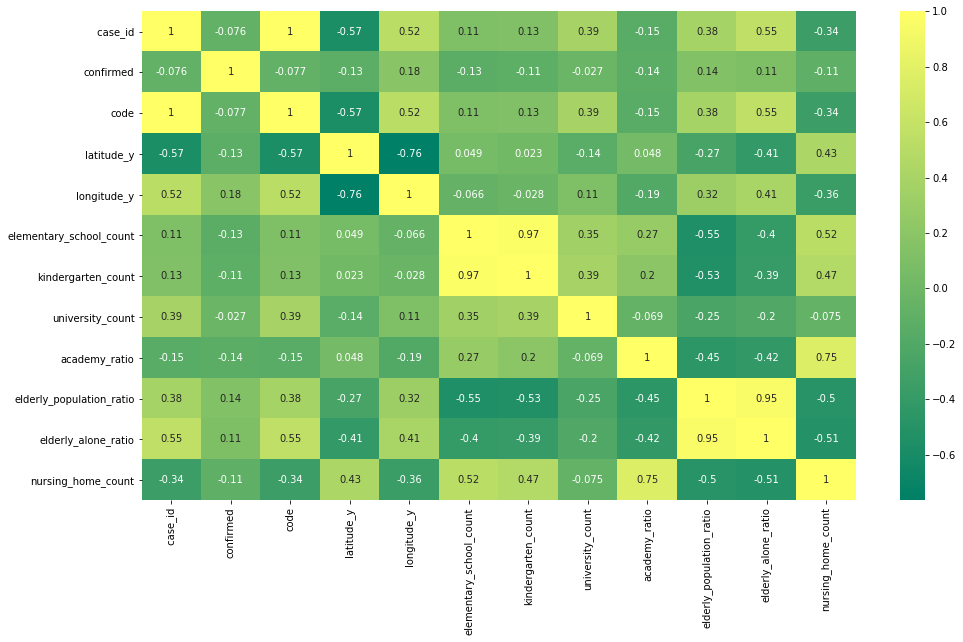

In [12]:
plt.figure(figsize = (16,9))
sns.heatmap(df[df.list].corr(),cmap = "summer", annot = True)
plt.show()

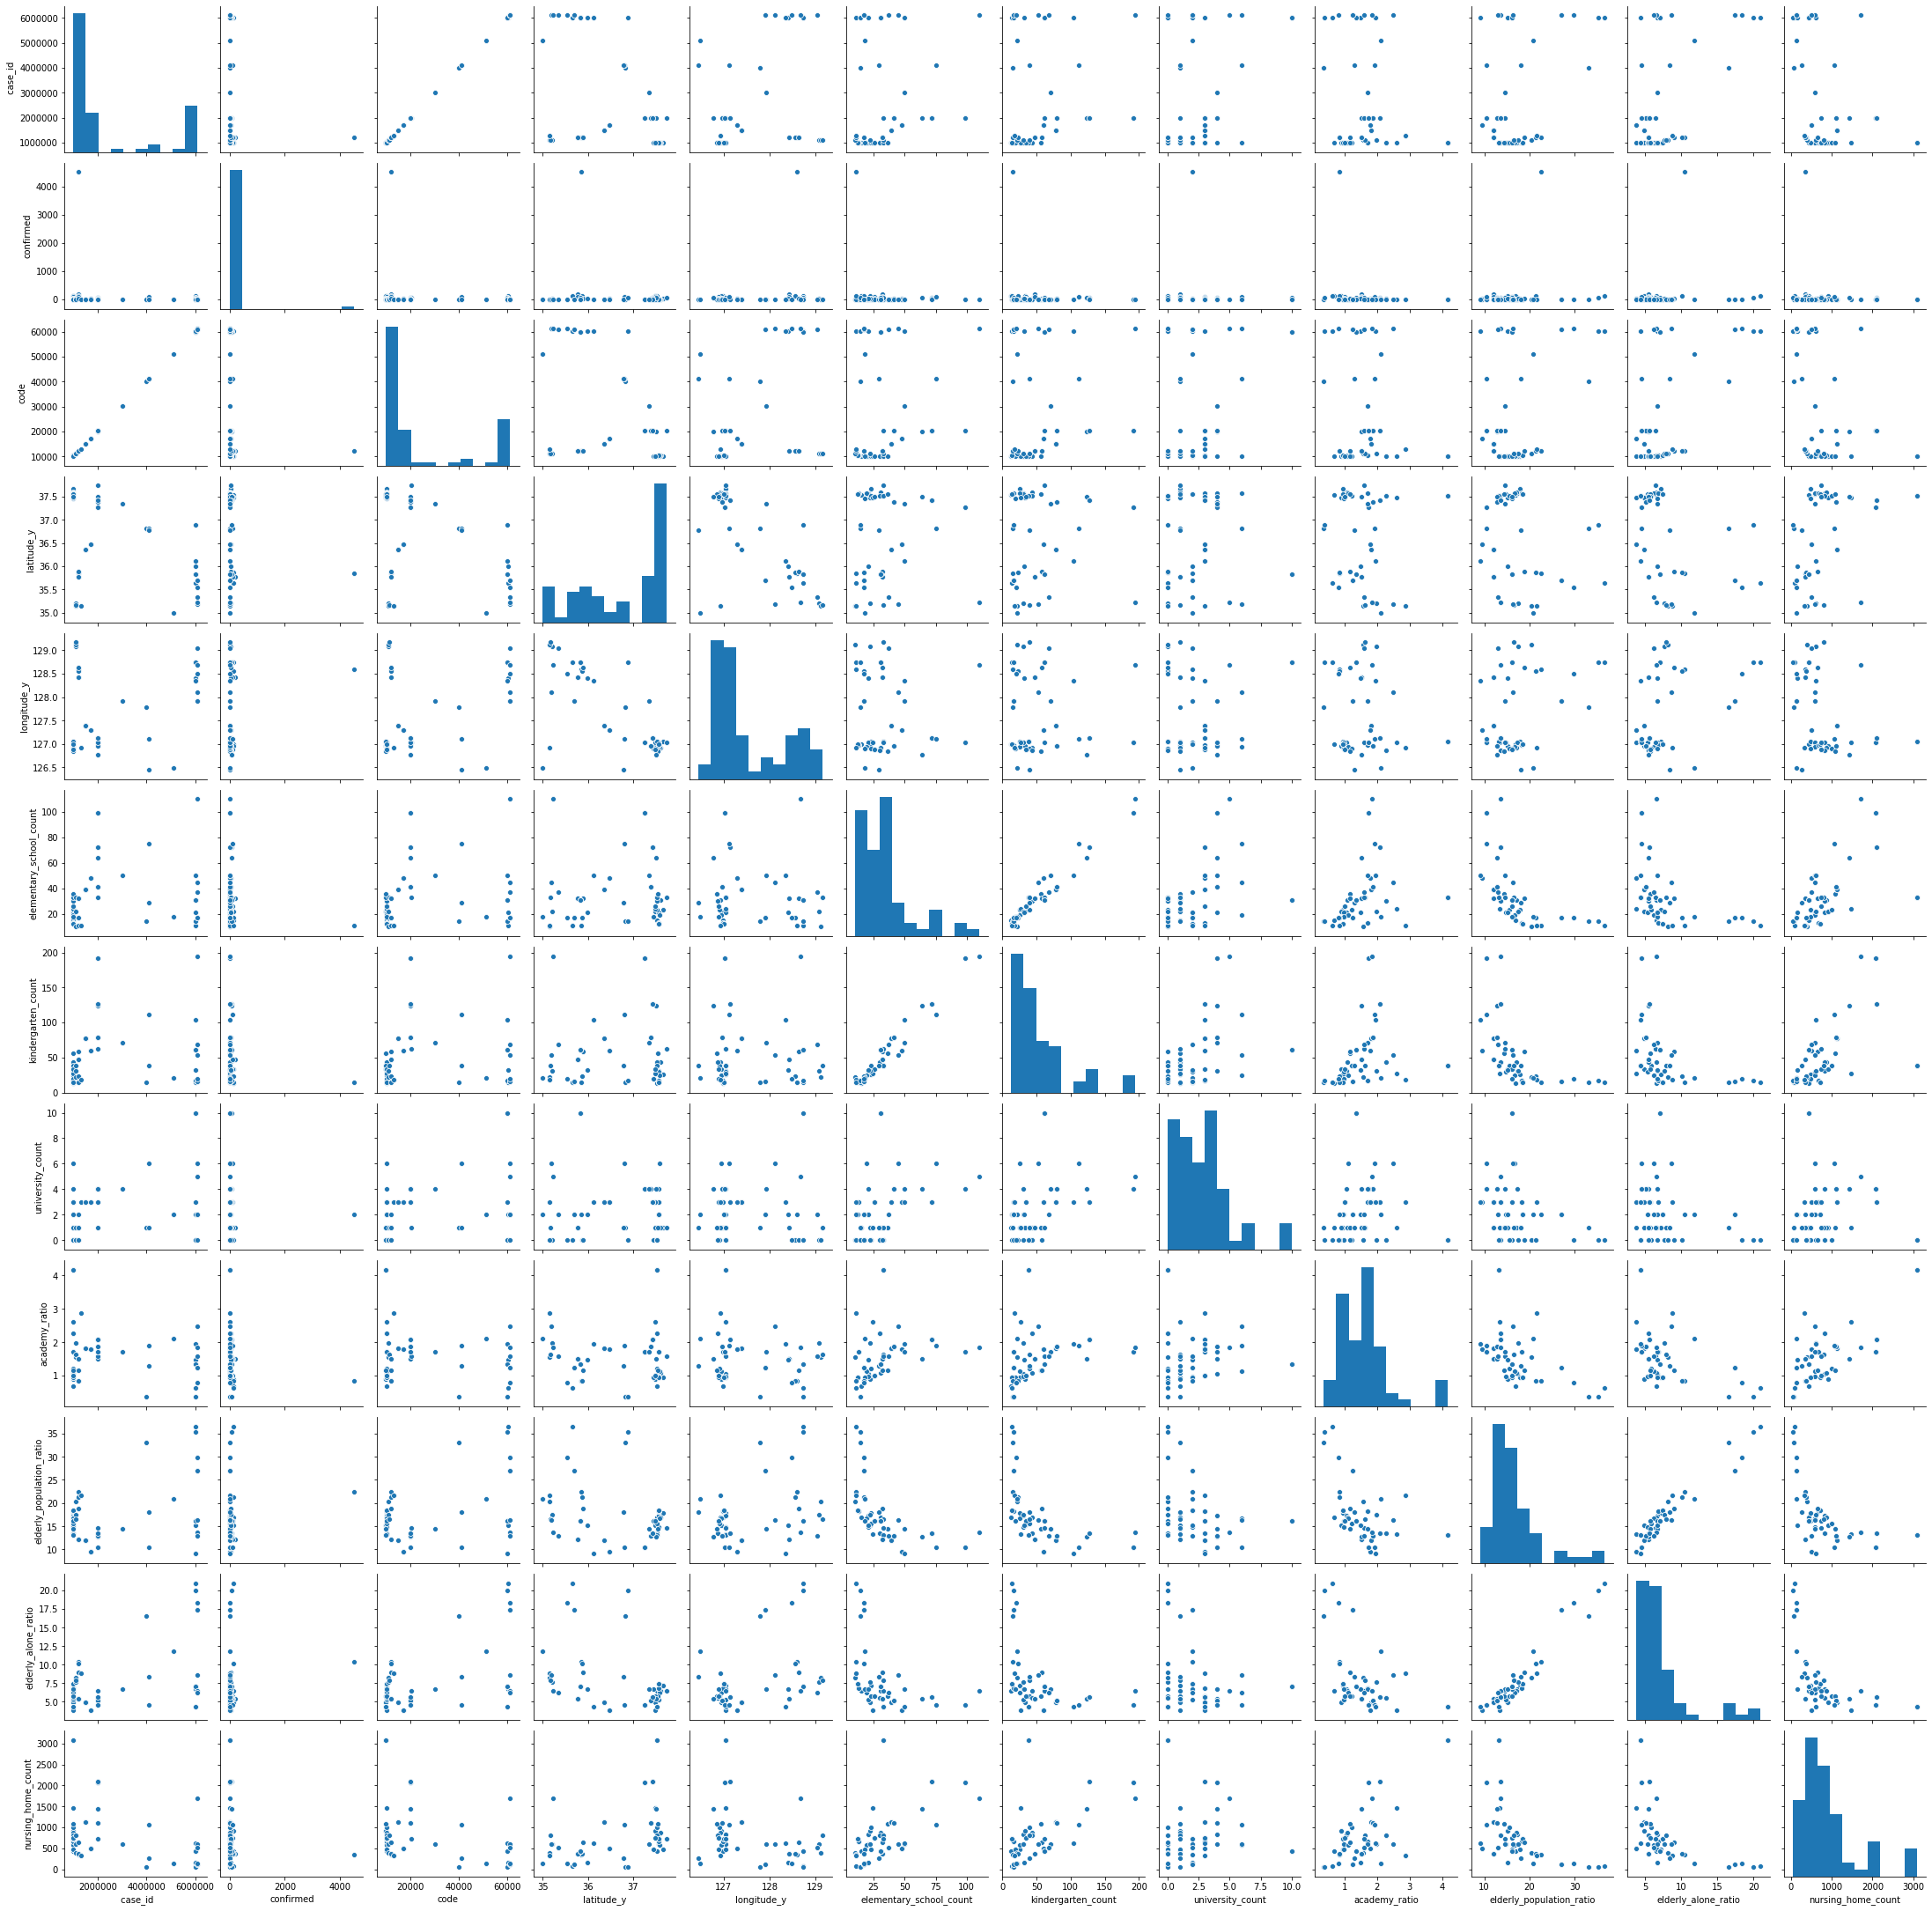

In [13]:
sns.pairplot(data = df[df.list])
plt.show()

     너무 많은 plot이 존재하므로 보기가 어렵다. 개인적으로 분석에 있어서 큰 의미를 주지 못하는 변수라고 생각되는 code와 case_id는 연속형 변수이지만 빼기로 결정한다.

In [15]:
df.list2 = ["confirmed","latitude_y","longitude_y","elementary_school_count","kindergarten_count", "university_count", "academy_ratio","elderly_population_ratio","elderly_alone_ratio","nursing_home_count"]

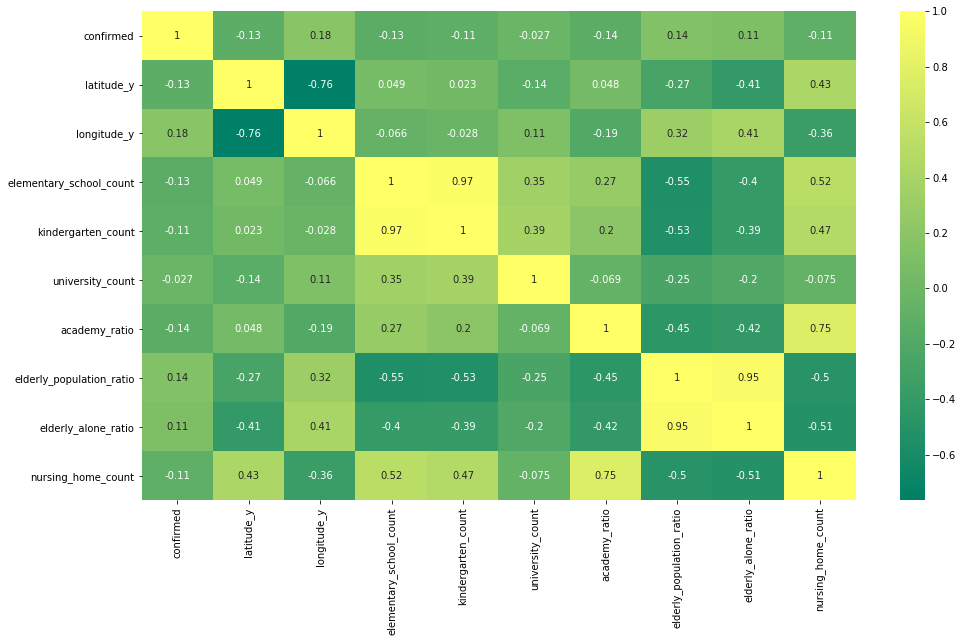

In [16]:
plt.figure(figsize = (16,9))
sns.heatmap(df[df.list2].corr(),cmap = "summer",annot = True)
plt.show()

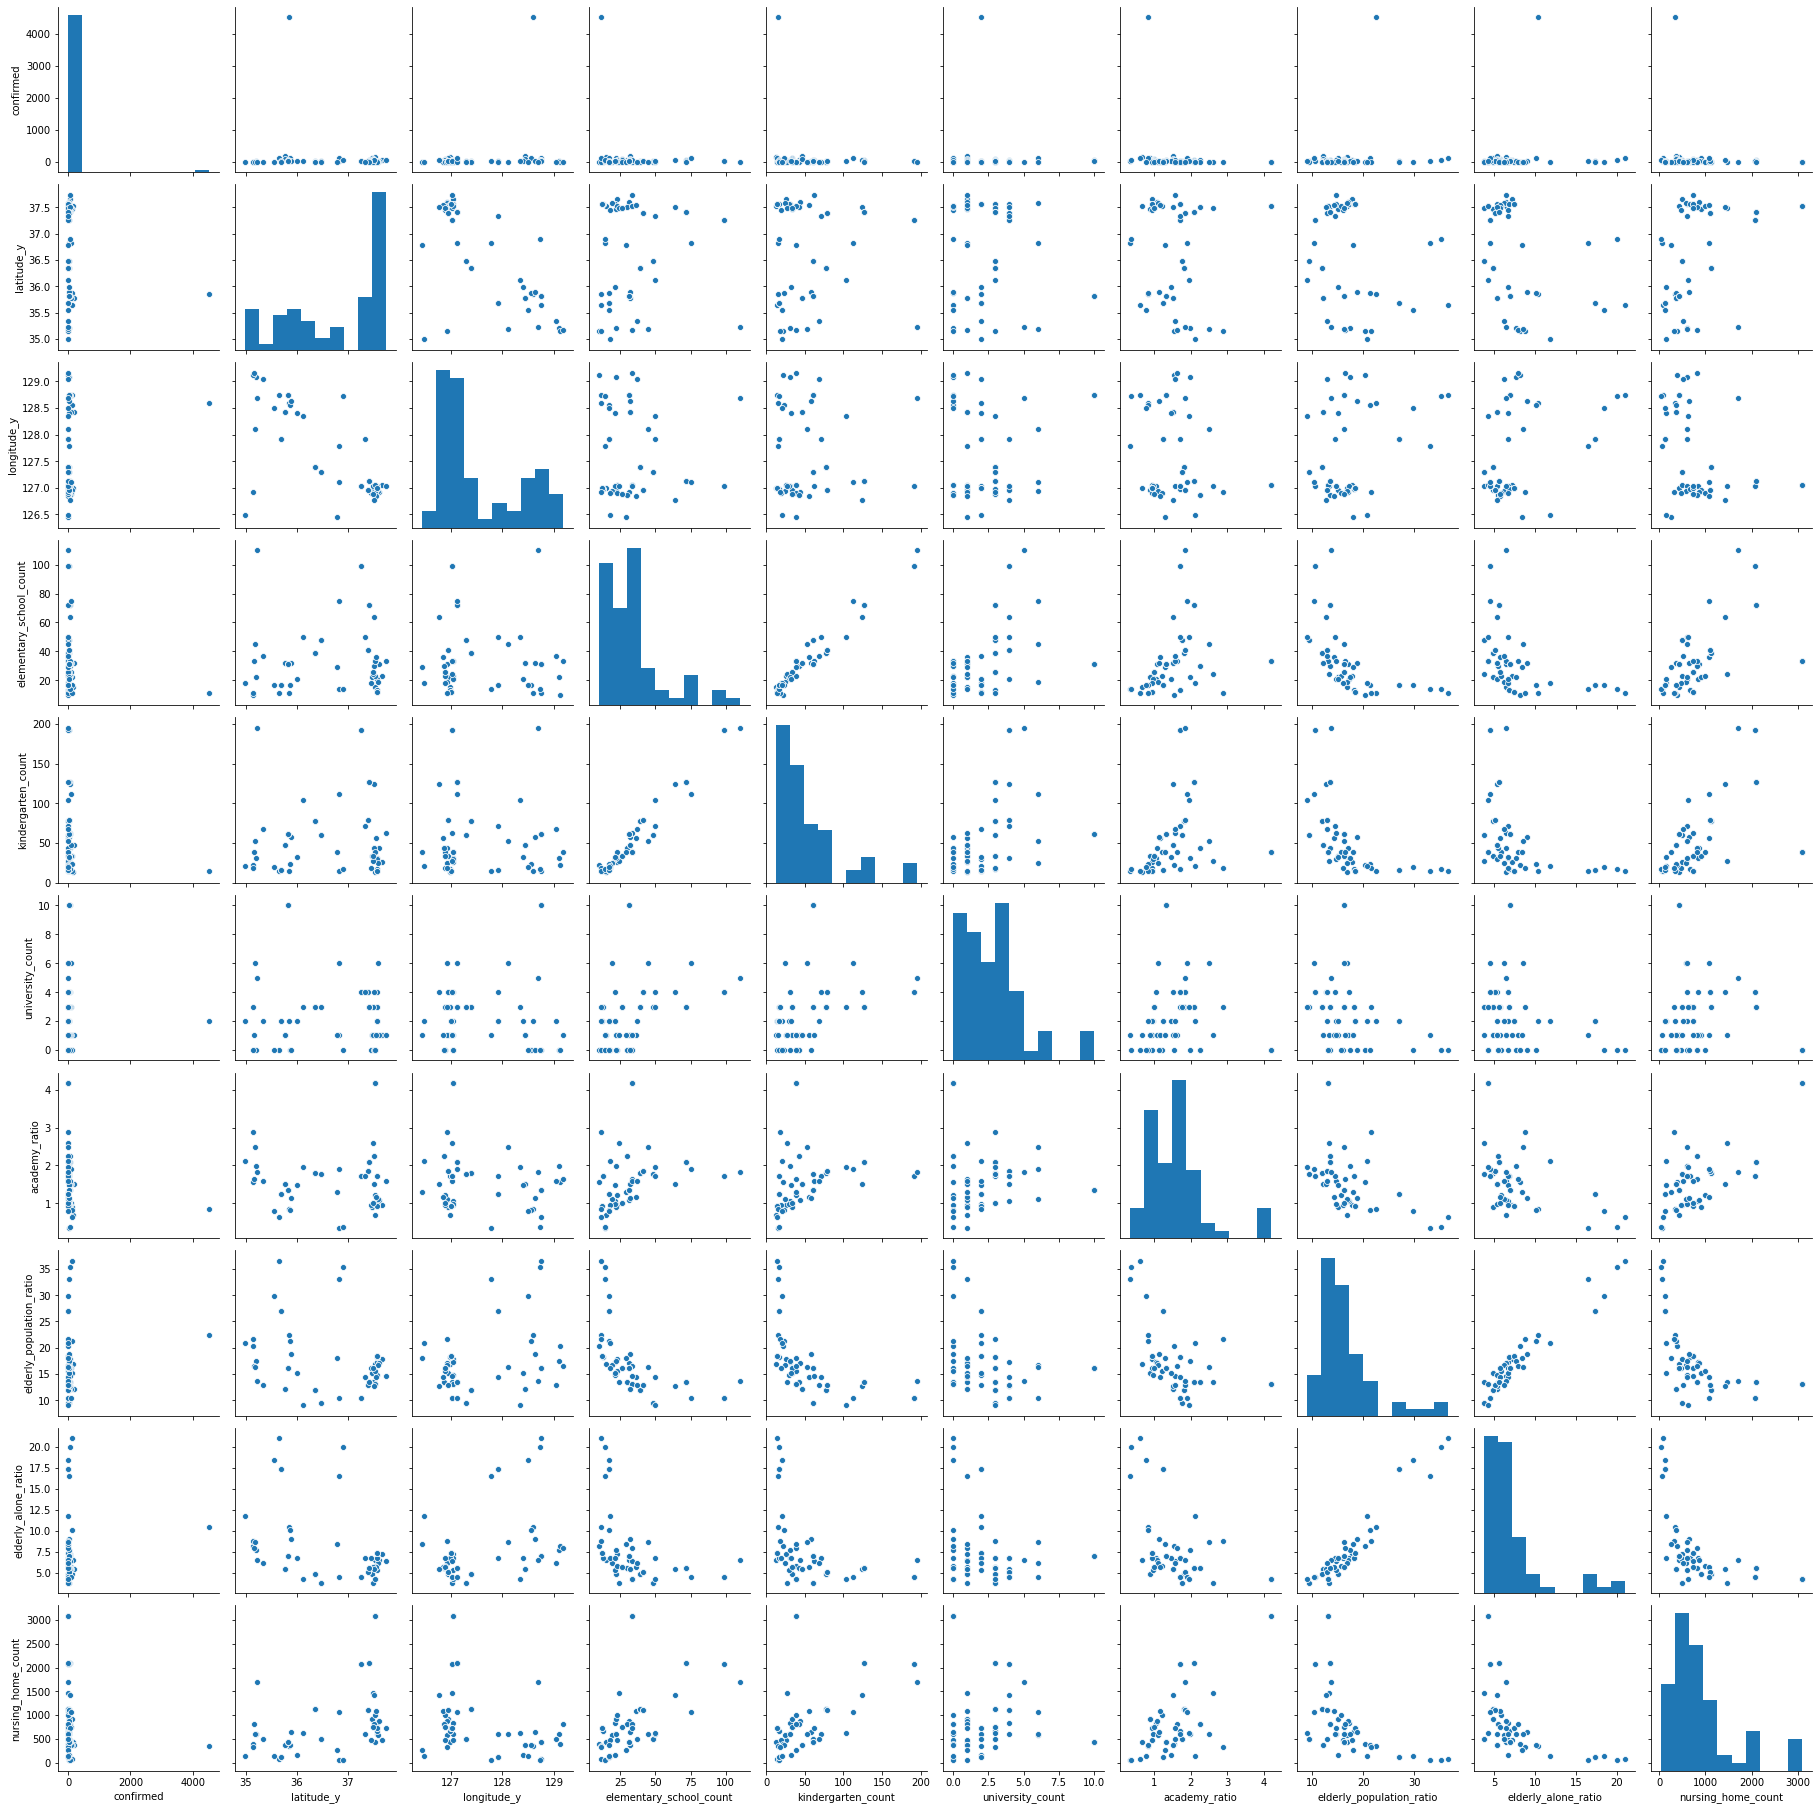

In [17]:
sns.pairplot(data = df[df.list2])
plt.show()

In [18]:
df[df.list2].corr()

,confirmed,latitude_y,longitude_y,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
confirmed,1.000000,-0.127041,0.183172,-0.130617,-0.113756,-0.026659,-0.135872,0.136431,0.105504,-0.107371
latitude_y,-0.127041,1.000000,-0.764575,0.048967,0.023124,-0.143539,0.048211,-0.272545,-0.410256,0.427210
longitude_y,0.183172,-0.764575,1.000000,-0.066060,-0.028349,0.111889,-0.194325,0.321964,0.406625,-0.355197
elementary_school_count,-0.130617,0.048967,-0.066060,1.000000,0.973424,0.348567,0.274185,-0.552580,-0.404646,0.523848
kindergarten_count,-0.113756,0.023124,-0.028349,0.973424,1.000000,0.392528,0.197761,-0.532407,-0.391598,0.473389
university_count,-0.026659,-0.143539,0.111889,0.348567,0.392528,1.000000,-0.069497,-0.251054,-0.200899,-0.074640
academy_ratio,-0.135872,0.048211,-0.194325,0.274185,0.197761,-0.069497,1.000000,-0.451975,-0.423480,0.752511
elderly_population_ratio,0.136431,-0.272545,0.321964,-0.552580,-0.532407,-0.251054,-0.451975,1.000000,0.953647,-0.495402
elderly_alone_ratio,0.105504,-0.410256,0.406625,-0.404646,-0.391598,-0.200899,-0.423480,0.953647,1.000000,-0.511931
nursing_home_count,-0.107371,0.427210,-0.355197,0.523848,0.473389,-0.074640,0.752511,-0.495402,-0.511931,1.000000


     가장 먼저 눈에 띄는 관계는 'elementary_school_count'와 'kindergarten_count'이다. 이 둘은 0.97에 해당하는 굉장히 높은 양의 상관계수를 가지고 있다. 이 변수들이 높은 상관성을 갖는 건 당연한 일이다. 대체로 초등학교나 유치원의 경우, 어린이들이 대상이기 때문에 거주지역이나 어린이가 많은 지역에 세울 수 밖에 없다. 목표하는 연령층이 비슷하기 때문에, 두 시설의 개수에 대한 상관성은 높은 것이 당연하다.
     
     두번째로 elderly_population_ratio와 elderly_alone_ratio의 관계가 눈에 들어온다. 이 둘 역시 굉장히 높은 양의 상관관계를 보이고 있다. 고령인구비율의 경우 (고령인구수/전체인구수)에 100을 곱한 값이며, 독거노인 가구비율의 경우 (독거 노인 가구 수)/(전체 가구 수)에 100을 곱한 값니다. 즉, 같은 65세 이상의 인구를 바탕으로 만든 변수들이기 때문에 상관관계는 높을 수 밖에 없다.
     
     또한 elementary_school_count와 kindergarten_count는 elderly_population_ratio, elderly_alone_ratio와는 강한 음의 상관관계를 보인다. 의외인 점은 nursing_home_count가 elderly_population_ratio, elderly_alone_ratio와 음의 상관관계를 보인다는 점이다. 일반적으로 노인 비율이 높으면 요양원 비율도 높을 것으로 예상되는 것과는 다른 결과를 보여준다. 

### 1 - 3 & 2 : 유의미한 시각화 및 Feature 생성

     우선 변수들에 대한 전반적인 분포를 확인해보기로 한다.

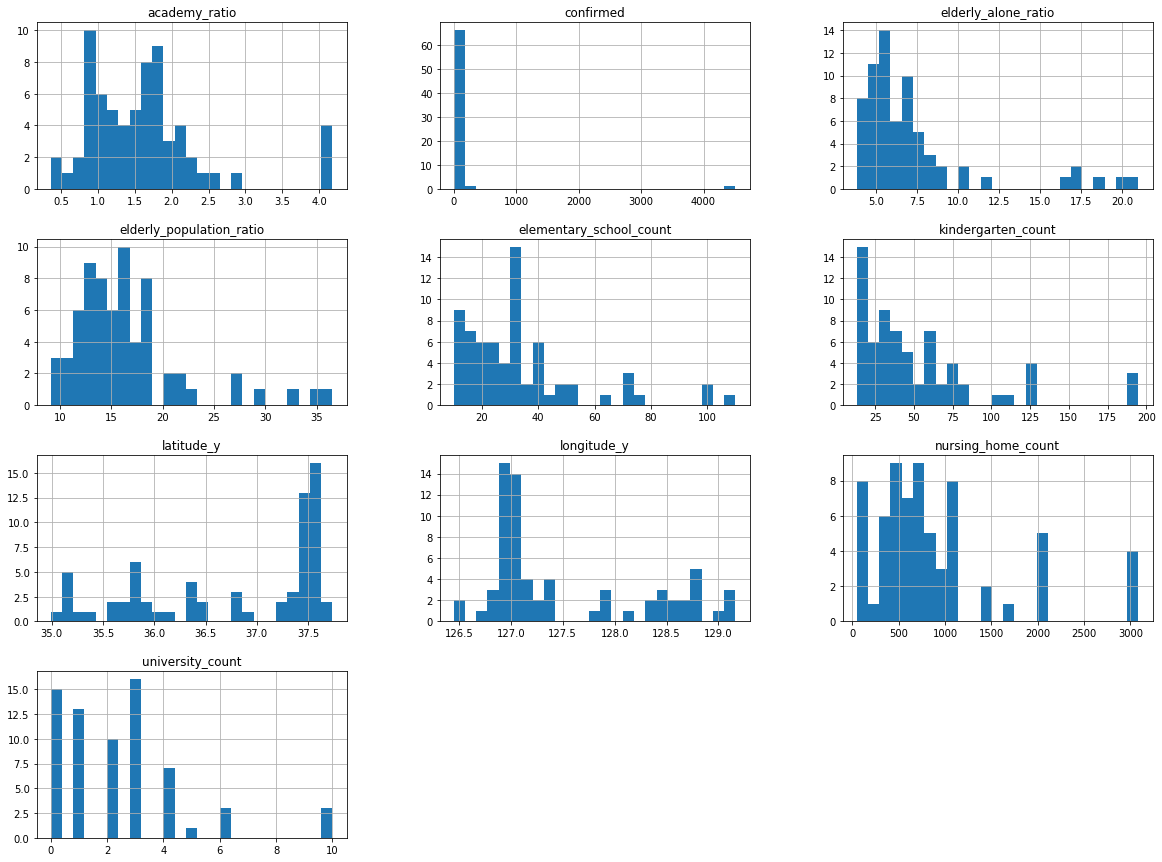

In [19]:
df[df.list2].hist(bins=25,figsize=(20,15))
plt.show()

     위의 각 변수들의 히스토그램을 보면 대부분의 히스토그램들이 왼쪽으로 치우쳐저 있음을 확인할 수 있다. 이 중 특히 눈에 띄는 변수는 confirmed 변수이다. 다른 변수들의 경우, 이상치라고 말할 만한 자료가 그렇게 한 눈에 들어오진 않으나, confirmed의 경우, 히스토그램이 왜곡될 정도로 극단적인 이상치가 있음을 알 수 있다. 이 이상치에 대해서 구체적으로 확인하기 위해, confirmed에 대해 지역별로 분류해봤다.

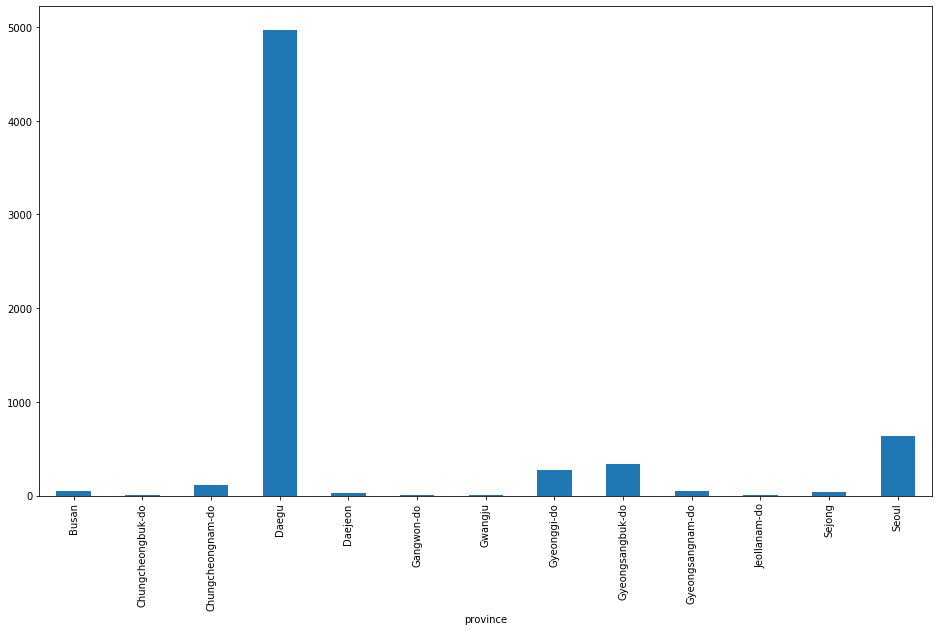

In [20]:
df.groupby("province")["confirmed"].sum().plot.bar(figsize=(16,9))
plt.show()

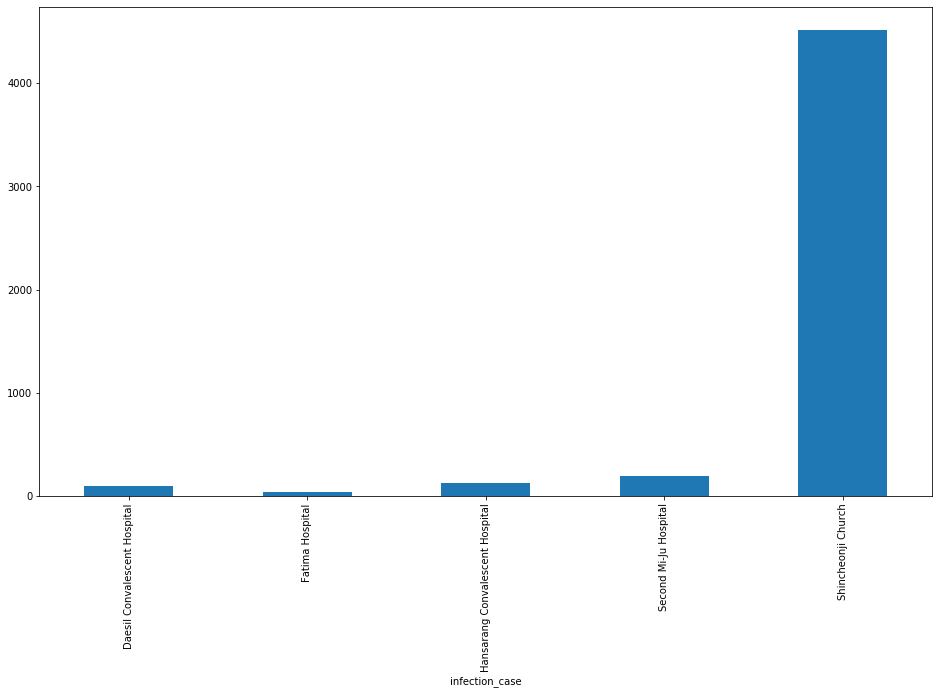

In [21]:
df[df["province"] == "Daegu"].groupby("infection_case")["confirmed"].sum().plot.bar(figsize=(16,9))
plt.show()

     구체적으로 분류해본 결과, 5000에 가까운 이상치는 대구 지역에서 발생한 것이었고, 이를 다시 감염경로로 구분해본 결과, 신천지 교회에서 감염된 것으로 파악됐다. 이 극단적인 이상치는 오류가 없는 데이터이고, 특이한 케이스이긴 하나 앞으로의 분석에 있어 결과를 저해할 여지가 있으므로 삭제하기로 결정한다.

In [22]:
idx1 = df[df["infection_case"]=="Shincheonji Church"].index
df = df.drop(idx1)

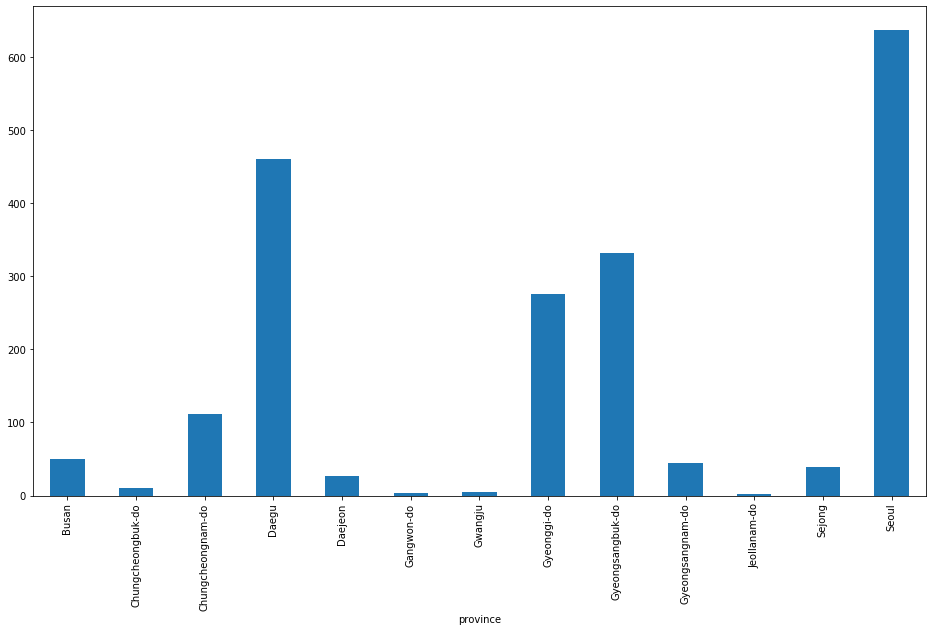

In [30]:
df.groupby("province")["confirmed"].sum().plot.bar(figsize=(16,9))
plt.show()

     이상치 제거 후, confirmed를 지역별로 구분하여 barplot으로 나타내면, 위와 같은 결과를 얻을 수 있다. 위 그래프를 보면 우선 사람이 많은 지역에 많은 감염자가 나타난 것으로 파악할 수 있다. 비말 감염이라는 코로나 바이러스의 특성상 사람이 많은 곳에 더 많은 감염자가 보이는 것은 당연한 것이다. 하여 서울, 대구, 경기도 등에서 더 많은 확진자를 보여주고 있다. 
     
     대구는 이상치를 제거 했음에도 불구하고 여전히 많은 감염자를 가지고 있다. 이는 대구가 대도시인 것 뿐만 아니라, 신천지 교회의 여파로 예상된다. 경북 지역 역시 높은 감염자 수를 보이는데 이 역시 대구의 여파로 인한 것이라고 조심스럽게 추측해볼 수 있다.

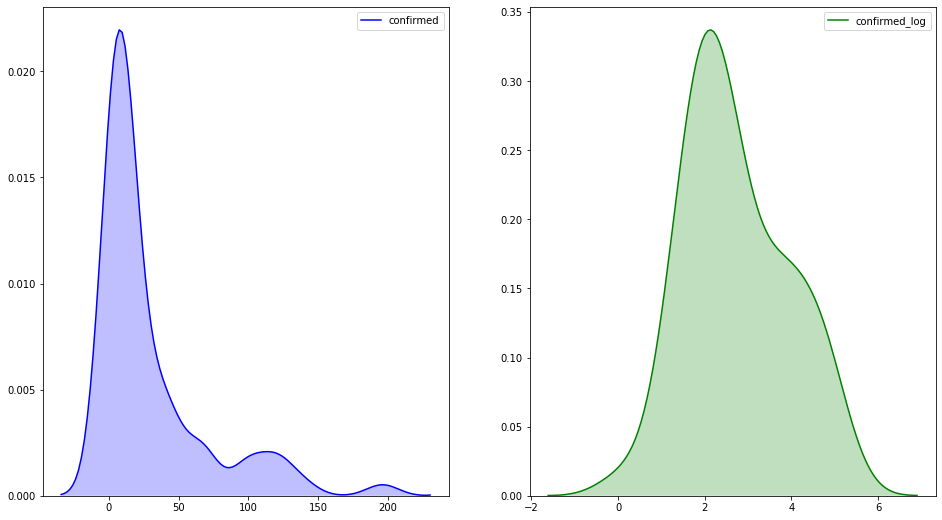

In [24]:
plt.figure(figsize = (16,9))

plt.subplot(121)
ax = sns.kdeplot(data = df["confirmed"], shade = True, color = "b")

plt.subplot(122)
df["confirmed_log"] = np.log1p(df["confirmed"])
ax = sns.kdeplot(data = df["confirmed_log"], shade = True, color = "g")


     이상치를 제거했음에도 불구하고 변수 confirmed의 분포는 왼쪽과 같다. 그래프로 볼 때, 분포가 왼쪽에 치우쳐져 있음을 확인할 수 있다. 정규분포에 가깝게 만들기 위해 confirmed에 log를 취했다. 오른쪽의 그래프는 로그 변환을 한 것으로 이전과는 다르게 확연하게 정규분포와 유사함을 알 수 있다. 따라서 confirmed_log라는 변수를 만들었다.

<Figure size 1152x648 with 0 Axes>

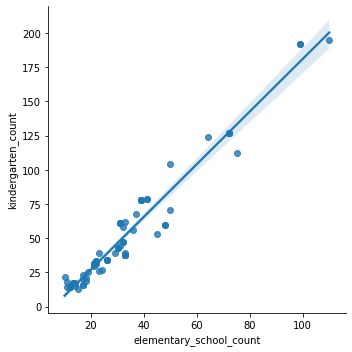

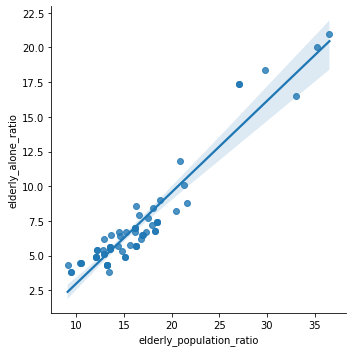

In [25]:
plt.figure(figsize = (16,9))

ax = sns.lmplot(x="elementary_school_count", y = "kindergarten_count",data = df)

ax = sns.lmplot(x = "elderly_population_ratio", y = "elderly_alone_ratio", data = df)


     위의 그래프들은 앞의 1-2에서 이야기한 강한 선형성을 가진 변수들끼리의 lmplot을 그린 것이다. 이런 높은 선형성을 가진 변수들은 EDA 이후, 본격적인 분석에 들어가게 되면 다중공선성 문제를 일으킬 가능성이 높다. 따라서 이를 적절하게 변환해주어야 한다. 해결하는 방법에는 대표적으로 변수 삭제 혹은 pca 방법 등이 있다.
     
     기존의 변수의 경우 유치원의 수와 초등학교의 수를 구분하여 변수로 만들었다. 여기서는 굳이 이 둘을 구분하지 않고, 합하여 '어린이 교육 시설의 수'라는 의미를 가진 변수를 만들었다. (여기서 어린이란 13세 이하의 아이들을 의미한다.)
     
     또한 앞으로의 EDA에 있어서 elderly_alone_ratio와 elderly_population_ratio의 경우, 둘 중 하나만의 변수를 선택해서 사용함으로서 당연한 결과를 피하려고 할 것이다.

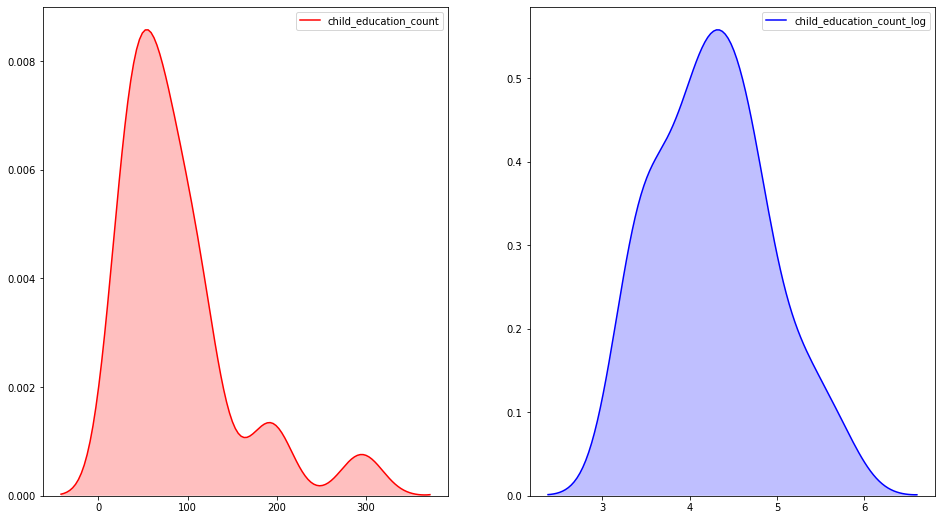

In [33]:
df["child_education_count"]=df["elementary_school_count"]+df["kindergarten_count"]
df["child_education_count_log"] = np.log1p(df["child_education_count"])

plt.figure(figsize = (16,9))

plt.subplot(121)
ax = sns.kdeplot(data = df["child_education_count"], shade = True, color = "r")

plt.subplot(122)
ax = sns.kdeplot(data = df["child_education_count_log"], shade = True, color = "b")

     위에서 감염자의 수가 인구 수와 관련이 있다는 것을 조심스럽게 추측했다. 이 추측을 바탕으로 '감염자 수가 연령층과 연관이 있다.'는 생각에 대해 확인해보려고 한다. 
     
     처음 히스토그램에서 뿐만 아니라 "child_education_count"에 대한 kdeplot까지, 대부분의 변수들이 정규분포를 따르기 보다는 왼쪽에 치우쳐져 있다. 최대한 정규화를 하기 위해 앞으로 사용할 변수들을 log 변환을 했다.

<Figure size 1152x648 with 0 Axes>

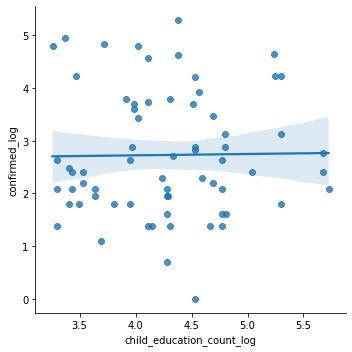

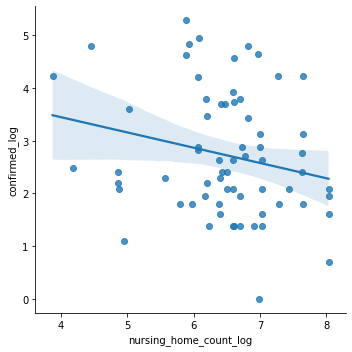

In [36]:
plt.figure(figsize = (16,9))

g = sns.lmplot(x = "child_education_count_log", y = "confirmed_log", data = df)

df["nursing_home_count_log"] = np.log1p(df["nursing_home_count"])
g = sns.lmplot(x = "nursing_home_count_log", y = "confirmed_log", data = df)

     기존의 "child_education_count"와 "nursing_home_count" 변수의 경우, 해당 지역의 연령대 인구 수를 추측해볼 수 있는 변수이다. child_education_count의 수가 클수록 해당 지역의 저연령대의 어린이들이 많이 거주함을 추측할 수 있으며, nursing_home_count가 클수록 고령인구의 수가 많음을 추측할 수 있다. 일반적으로 이 두 연령층의 사람들은 면연력이 약하기 때문에 해당 연령층이 많을수록 확진자가 많을 것으로 추측했다. 이 추측을 바탕으로 confirmed_log 변수와 각각 lmplot을 만들었으나 추측과는 반대되는 결과를 얻었다. 더 구체적으로 파악하기 위해 각 시설당 감염자의 수로 분석해봤다.

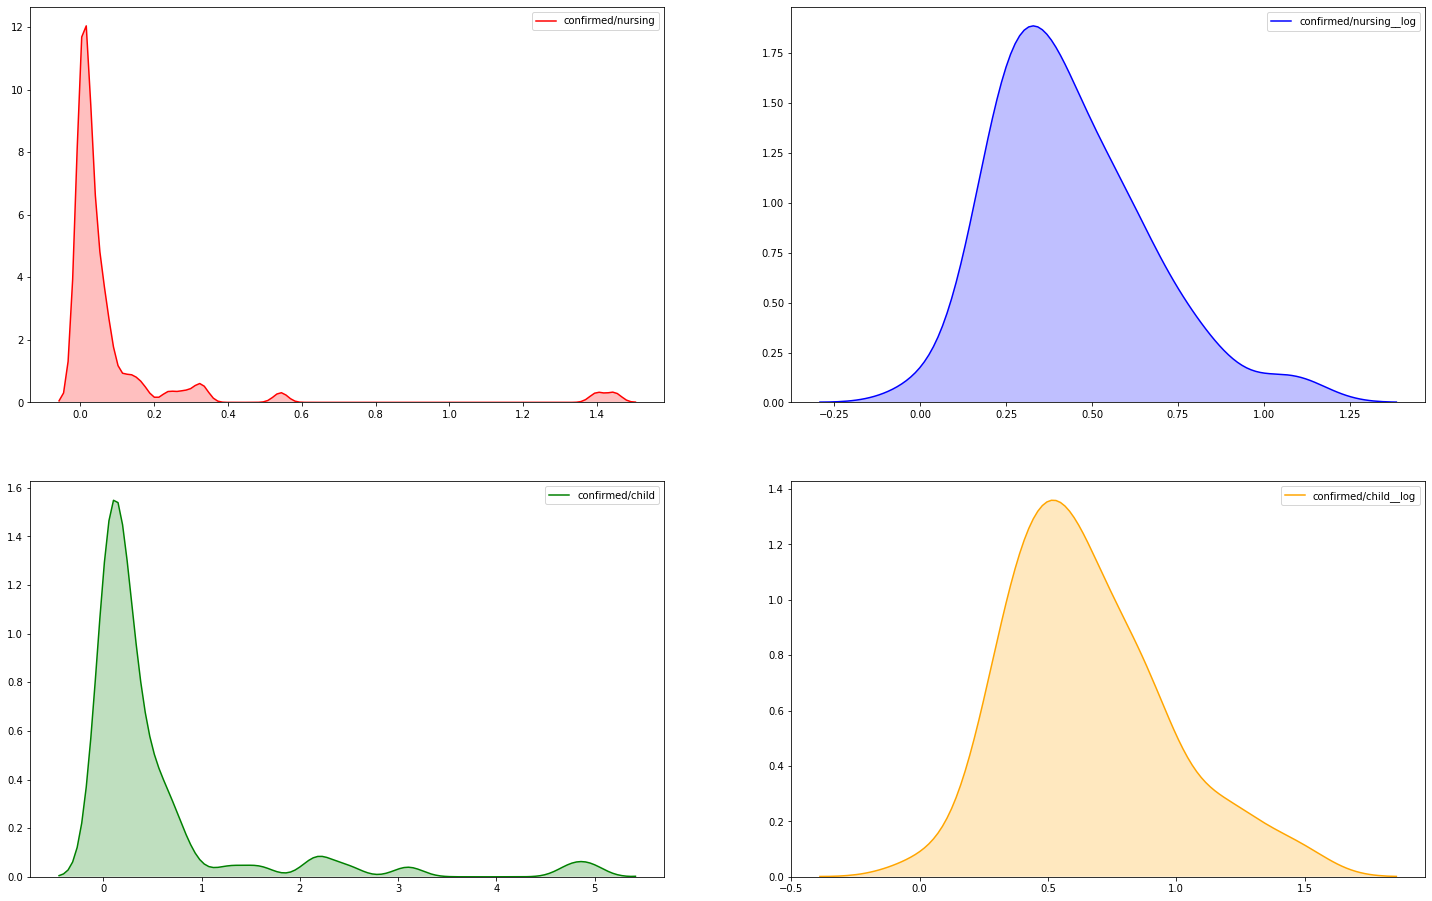

In [40]:
df["confirmed/nursing"] = df["confirmed"]/df["nursing_home_count"]
df["confirmed/child"] = df["confirmed"]/df["child_education_count"]
df["confirmed/nursing__log"] = df["confirmed_log"]/df["nursing_home_count_log"]
df["confirmed/child__log"] = df["confirmed_log"]/df["child_education_count_log"]


plt.figure(figsize=(25,16))

plt.subplot(221)
ax = sns.kdeplot(data = df["confirmed/nursing"], shade = True, color = "r")

plt.subplot(222)
ax = sns.kdeplot(data = df["confirmed/nursing__log"], shade = True, color = "b")

plt.subplot(223)
ax = sns.kdeplot(data = df["confirmed/child"], shade = True, color = "g")

plt.subplot(224)
ax = sns.kdeplot(data = df["confirmed/child__log"], shade = True, color = "orange")

     위의 그래프는 왼쪽부터 해서 "요양원 시설 1개당 감염자의 수", "요양원 시설 1개당 감염자의 수 (로그변환)", "어린이 교육 시설 1개당 감염자의 수", "어린이 교육 시설 1개당 감염자의 수 (로그변환)"의 분포를 보여주는 그래프들이다. 확실히 각각의 변수를 로그변환한 뒤 나눴을 때, 훨씬 정규분포적이며 안정적인 분포를 보여준다. 이를 바탕으로 "요양원 시설 1개당 감염자의 수"와 "어린이 교육 시설 1개당 감염자의 수"의 로그변환 값들의 상관성을 파악해보려고 한다.

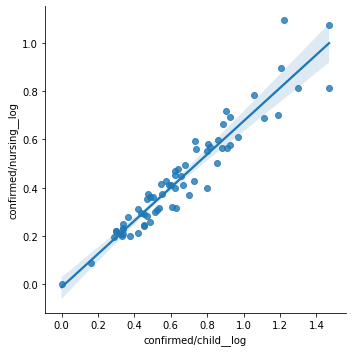

In [47]:
sns.lmplot(x = "confirmed/child__log", y = "confirmed/nursing__log", data = df)

     요양원 1개당 감염자의 수_log 와 어린이 교육시설 1개당 감염자의 수_log의 lmplot은 위와 같이 나왔다. 위 lmplot을 통해 굉장히 강한 양의 선형성이 있음을 대략적으로 파악할 수 있다. 
     
     이를 통해 요양원 1개당 감염자의 수가 클수록 어린이 교육시설 1개당 감염자의 수 역시 커진다는 의미를 도출할 수 있다. 즉, 다른 관점에서 보면 평균적으로 어린이 교육시설이나 양로원 시설이 적은 지역에서 더 많은 감염자가 나타났다고 조심스럽게 추측할 수 있다. 이는 감염자들이 어린이나 고령인구가 아니라, 대부분 청소년부터 건장한 성인들이라는 것을 예측해볼 수 있다.

### 2. Feature 생성 

     과제를 진행하는데 있어서 아래의 8개의 Feature를 생성했다.

"confirmed_log"  
"child_education_count"  
"child_education_count_log"  
"nursing_home_count_log"  
"confirmed/nursing"  
"confirmed/child"  
"confirmed/nursing__log"  
"confirmed/child__log"


